
# Project: Investigating the TMDb movie data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a project to analyse data from The Movie Database (TMDb) and extract insight into factors that influence revenues and profits of the movies. The data set contains information about 10,800 movies collected from The Movie Database (TMDb).

Questions that this analysis seeks to anwser include:
<ol id='toc'>
<li> <a href='#q1'>Which movie has the highest Budget?</a></li>
<li> <a href='#q2'>Which movie generated the highest Revenue and Profit?</a></li>
<li> <a href='#q3'>What genre is most produced?</a></li>
<li> <a href='#q4'>What genre of movies received higher Popularity?</a></li>
<li> <a href='#q5'>What genre of movies received higher User Ratings?</a></li> 
<li> <a href='#q6'>What genre of movies has highest Budgets?</a></li>
<li> <a href='#q7'>What genre of movies has highest Revenues?</a></li>
<li> <a href='#q8'>Do high Budget movies make higher Revenues?</a></li>
<li> <a href='#q9'>What genre of music has highest profit?</a></li>
<li> <a href='#q10'>How does User Rating and Popularity influence Revenue?</a></li>
</ol>    

In [292]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [293]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

# preview the dataset
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [294]:
# inspect data types of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [295]:
# preview statistics about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [296]:
# check the shape to know the # of rows and columns
df.shape

(10866, 21)

#### The original dataset contains a total of 10866 entries with 21 columns

<span id='assume'><strong>Assumption:</strong></span>
The statistics reveal that budgets and revenues for over 50% of the movies in the dataset are zero. According to [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home),

> <q>It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place.</q>

Therefore, this project assumes a zero value for these columns 'budget' and 'revenue' as a missing value. These rows would be dropped during data cleaning.


### Data Cleaning 

#### Remove rows with zero (0) budgets and renevues as indicated <a href='#assume'>here</a>

In [297]:
df = df[(df.budget!=0) & (df.revenue!=0)]
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [298]:
# check the shape for the # of rows and columns after 
df.shape

(3855, 21)

#### The following columns in the dataset are not relevant to the questions for this analysis, therefore, it will be better dropping them.
<ul> 
    <li>imdb_id</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>vote_average</li>
    <li>release_date</li>
    <li>release_year</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
</ul>

In [299]:
# drop columns which are not considered in this analysis
drop_col_list = ['imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'vote_average', 'release_date', 'release_year', 'budget_adj', 'revenue_adj']
df.drop(drop_col_list, axis=1, inplace=True)

In [300]:
# preview after dropping columns
df.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,vote_count
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185


#### Rename vote_count column to user_rating

In [301]:
df.rename(index=str, columns={"vote_count": "user_rating"}, inplace=True)

#### Check the dataset for nulls.

In [302]:
# check for nulls
df.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
runtime                  0
genres                   0
production_companies    46
user_rating              0
dtype: int64

The above shows that the dataset contains null values. However, those are mostly string type columns. The most appropriate step is to drop them since there is no meaningful way to fill them up.  

In [303]:
# drop rows with any null values 
df.dropna(inplace=True)

In [304]:
# checks if any column has null values
df.isnull().sum().any()

False

#### Check the dataset for duplicate rows.

In [305]:
# print number of duplicates dataset
print(sum(df.duplicated()))

1


####  Remove duplicate rows

In [306]:
# drop duplicates
df.drop_duplicates(inplace=True)

# confirm removal of duplicates
print(sum(df.duplicated()))

0


In [307]:
# check the shape after cleaning
df.shape

(3806, 10)

#### The dataset, after cleansing, contains a total of 3806 entries with 10 columns

In [308]:
df.describe()

,id,popularity,budget,revenue,runtime,user_rating
count,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000
mean,40033.916185,1.203507,3.759921e+07,1.089477e+08,109.362585,534.021545
std,67578.000757,1.480473,4.231970e+07,1.772814e+08,19.855679,883.682139
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000
25%,5932.500000,0.470635,1.000000e+07,1.429262e+07,96.000000,74.000000
50%,11255.000000,0.810226,2.500000e+07,4.620904e+07,106.000000,208.500000
75%,38578.000000,1.387058,5.000000e+07,1.260625e+08,119.000000,584.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000


<a id='eda'></a>
## Exploratory Data Analysis

<span id='q1'> </span>
### Question 1. Which movie has the highest Budget?
<a href='#toc'>Top</a>

>Compute the movie with the highest budget using idxmax()

In [309]:
# max budget movie 
df[['original_title', 'budget']].query('budget == {}'.format(df['budget'].max()))#['budget'].max()

,original_title,budget
2244,The Warrior's Way,425000000


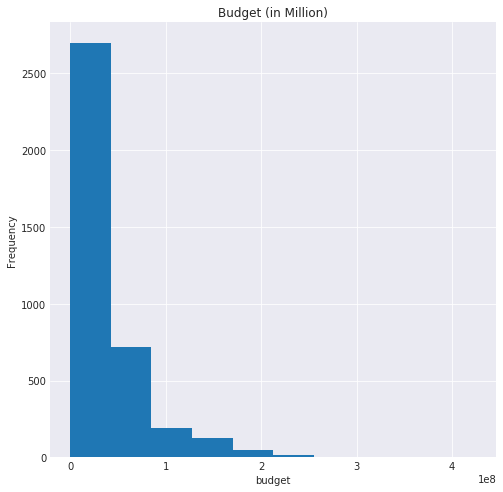

In [310]:
plot=df['budget'].plot(kind='hist',figsize=(8,8), title='Budget (in Million)');
plot.set_xlabel("budget");

Histogram for Budget is skewed to the right. The median would be a better measure of central tendency for this distribution.

<span id='q2'> </span>
### Question 2. Which movie generated the highest Revenue and Profit?
<a href='#toc'>Top</a>

> Add a profit column to df. Compute the average profit for each movie.

In [311]:
# add 'profit' column to the df_genre.
df['profit'] = df['revenue'] - df['budget']

# preview to confirm addition of column
df.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,user_rating,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,228436354


In [312]:
# max revenue movie 
df[['original_title', 'revenue']].query('revenue == {}'.format(df['revenue'].max()))

,original_title,revenue
1386,Avatar,2781505847


In [313]:
# max profit movie 
df[['original_title', 'profit']].query('profit == {}'.format(df['profit'].max()))

,original_title,profit
1386,Avatar,2544505847


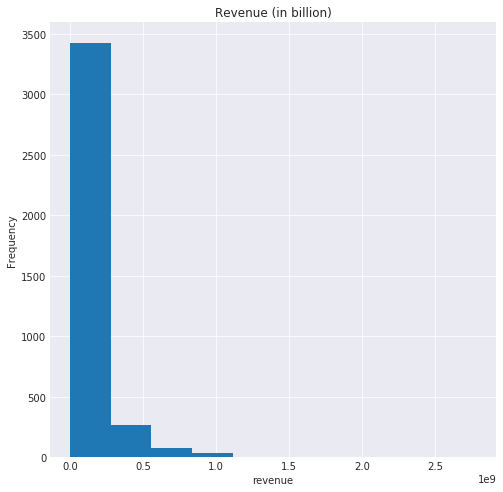

In [314]:
plot=df['revenue'].plot(kind='hist',figsize=(8,8), title='Revenue (in billion)');
plot.set_xlabel("revenue");

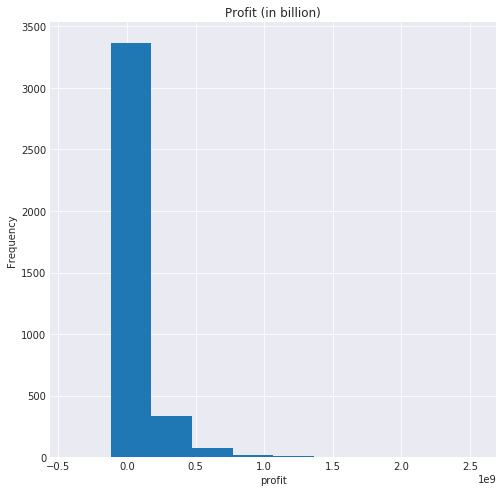

In [315]:
plot=df['profit'].plot(kind='hist',figsize=(8,8), title='Profit (in billion)');
plot.set_xlabel("profit");

Histogram for Revenue and Profit is also skewed to the right. The median would be a better measure of central tendency for these distribution.

<span id='q3'> </span>
### Question 3. Which Genre is most produced?
<a href='#toc'>Top</a>

>The "genres" column is a multi-valued (i.e. each movie belongs to one or more genre). Therefore, I split the genre values and use the result to create rows for each genre. 

>To acheive this, I employed the str.split() function on the column values and then used itertools' chain.from_iterable() method [[1](https://realpython.com/python-itertools/)] to flatten all the splitted genres into a single list. To ensure that each genre appears only once, I encapsulated the result into a set object. 

In [316]:
import itertools as itl

# split genres into individual genres and flatten to a set. This produces a set with unique genre entries.
genre_list = set(itl.chain.from_iterable(df['genres'].str.split('|')))

In [317]:
#define an empty dataframe
df_genre = df[df['genres'] == 'dummy']

# iterate over the set of genre and use it to separate rows containing multiple genres
for g in genre_list:
    # select all rows that contain genre contained in g.
    dfg = df[df['genres'].str.contains(g)].copy() 
    # replace the column of the returned rows with the current genre 
    dfg['genres'] = g
    # append results to df_genre
    df_genre = df_genre.append(dfg)
df_genre.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,user_rating,profit
32,254470,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,115,Music,Universal Pictures|Gold Circle Films|Brownston...,1264,258506194
40,277216,3.202719,28000000,201634991,Straight Outta Compton,O'Shea Jackson Jr.|Corey Hawkins|Jason Mitchel...,147,Music,New Line Cinema|Universal Pictures|Legendary P...,918,173634991


In [318]:
# Count production by movie genres
genre_production_df = df_genre.groupby('genres').count()['id']
genre_production_df

genres
Action             1076
Adventure           743
Animation           199
Comedy             1336
Crime               649
Documentary          26
Drama              1730
Family              417
Fantasy             395
Foreign              10
History             128
Horror              459
Music               131
Mystery             343
Romance             659
Science Fiction     517
TV Movie              1
Thriller           1194
War                 119
Western              52
Name: id, dtype: int64

In [319]:
# max production 
genre_production_df.idxmax()

'Drama'

In [320]:
# min production 
genre_production_df.idxmin()

'TV Movie'

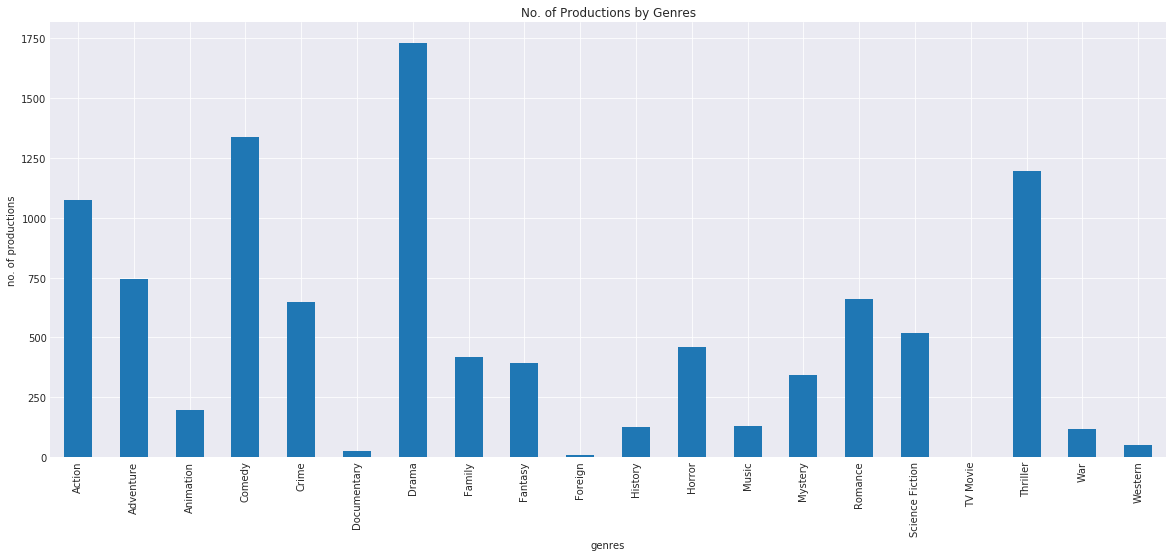

In [321]:
# bar graph of productions by movie genres
plot=genre_production_df.plot.bar(figsize=(20,8), title='No. of Productions by Genres');
plot.set_ylabel("no. of productions");

#### This graph shows that Drama is the most produced genre of movies while TV Movie is the least.

<span id='q4'> </span>
### Question 4. Which Genre is most popular? 
<a href='#toc'>Top</a>

> Compute the mean popularity for each genre and select the maximum value.

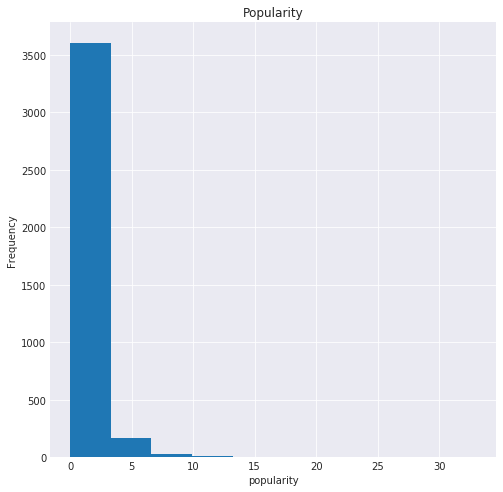

In [322]:
plot=df['popularity'].plot(kind='hist',figsize=(8,8), title='Popularity');
plot.set_xlabel("popularity");

The distribution skewed to the right. The median would be a better measure of central tendency.

In [323]:
# Median popularity by movie genres. 
mean_genre_popularity_df = df_genre.groupby('genres').median()['popularity']
mean_genre_popularity_df

genres
Action             1.013571
Adventure          1.177428
Animation          1.432796
Comedy             0.778343
Crime              0.811539
Documentary        0.269543
Drama              0.706539
Family             1.089268
Fantasy            1.241191
Foreign            0.147924
History            0.758072
Horror             0.662175
Music              0.633882
Mystery            0.848473
Romance            0.709235
Science Fiction    1.068126
TV Movie           0.273628
Thriller           0.854977
War                0.873616
Western            0.682719
Name: popularity, dtype: float64

In [324]:
# max average popularity by genre
mean_genre_popularity_df.idxmax()

'Animation'

In [325]:
# min average popularity by genre 
mean_genre_popularity_df.idxmin()

'Foreign'

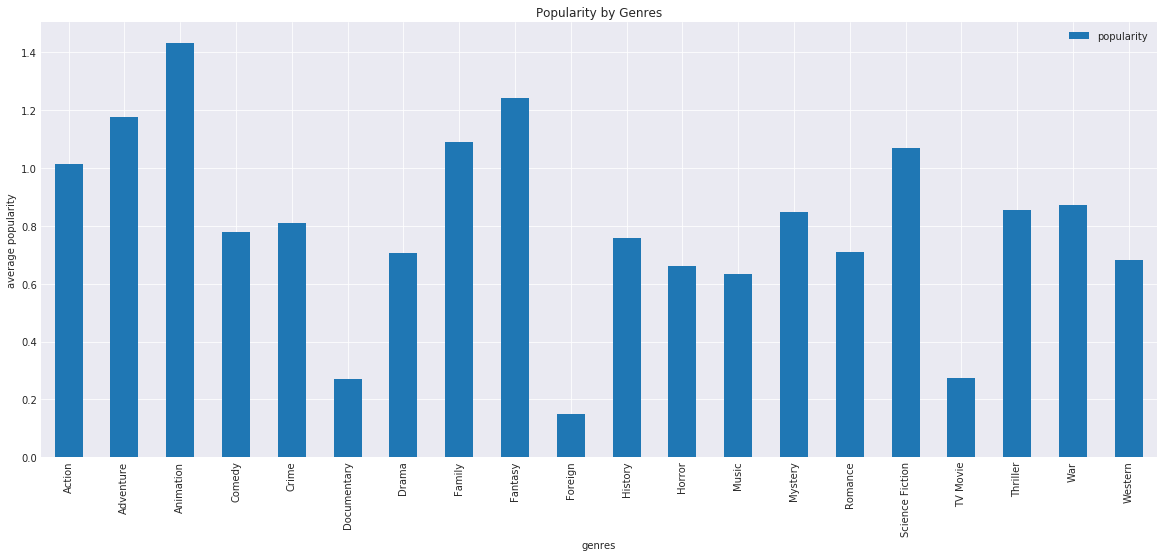

In [326]:
# bar graph of popularity by movie genres
plot=mean_genre_popularity_df.plot.bar(figsize=(20,8), title='Popularity by Genres');
plot.set_ylabel("average popularity");
plot.legend();

#### This graph shows that Animation is the most popular genre of movies while Foreign is the least

<span id='q5'> </span>
### Question 5. What Genre of movies received higher user ratings?
<a href='#toc'>Top</a>

> Compute the mean user rating for each genre and select the maximum value.

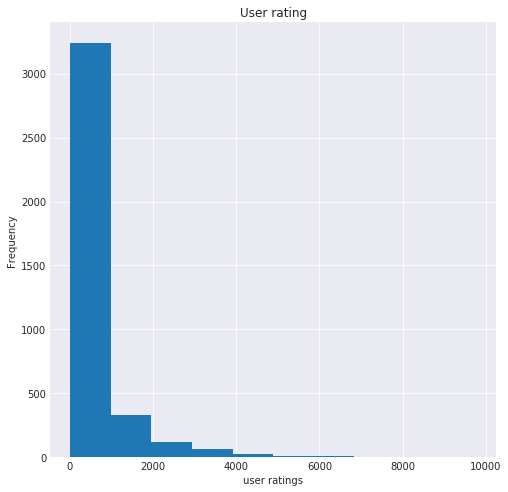

In [327]:
plot=df['user_rating'].plot(kind='hist',figsize=(8,8), title='User rating');
plot.set_xlabel("user ratings");

The distribution skewed to the right. The median would be a better measure of central tendency.

In [328]:
# Median user rating by movie genres
mean_genre_user_rating_df = df_genre.groupby('genres').median()['user_rating']
mean_genre_user_rating_df

genres
Action             306.0
Adventure          391.0
Animation          545.0
Comedy             196.0
Crime              215.0
Documentary         60.5
Drama              165.0
Family             331.0
Fantasy            451.0
Foreign             16.0
History            200.5
Horror             162.0
Music              138.0
Mystery            215.0
Romance            167.0
Science Fiction    362.0
TV Movie            35.0
Thriller           233.0
War                270.0
Western            153.5
Name: user_rating, dtype: float64

In [329]:
# max average user rating by genre
mean_genre_user_rating_df.idxmax()

'Animation'

In [330]:
# min average user rating by genre 
mean_genre_user_rating_df.idxmin()

'Foreign'

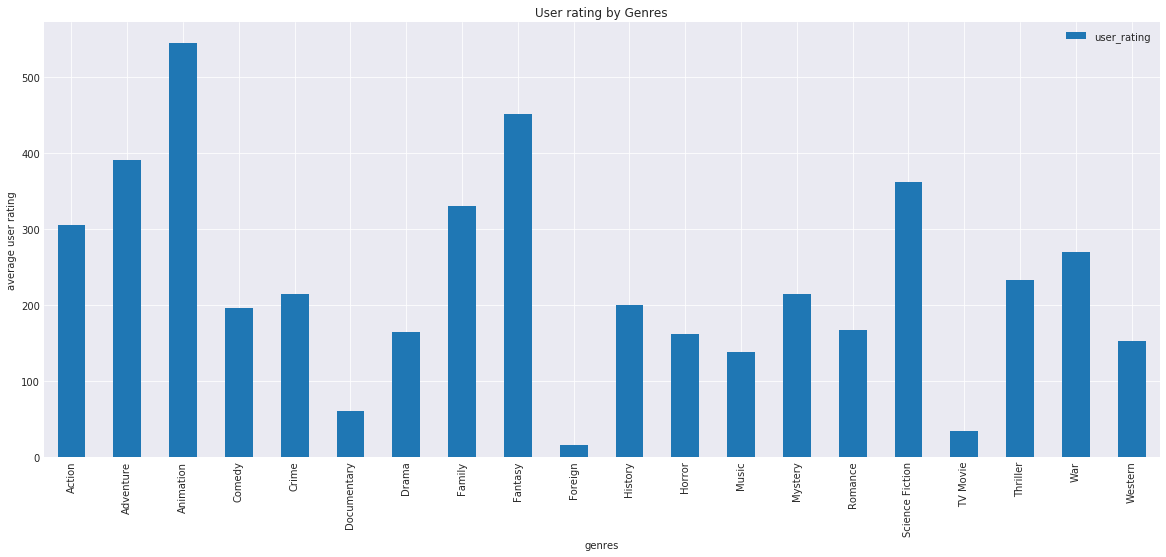

In [331]:
# bar graph of user rating by movie genres
plot=mean_genre_user_rating_df.plot.bar(figsize=(20,8), title='User rating by Genres');
plot.set_ylabel("average user rating");
plot.legend();

#### This graph reveals that Animation has the most user rating while Foreign is the least

<span id='q6'> </span>
### Question 6. Which genre of movies has big Budgets?
<a href='#toc'>Top</a>

> Compute the mean budget for each genre and select the max.

In [332]:
# Average budget by movie genres
mean_genre_budget_df = df_genre.groupby('genres').median()['budget']
mean_genre_budget_df

genres
Action             40000000.0
Adventure          50000000.0
Animation          75000000.0
Comedy             24000000.0
Crime              25000000.0
Documentary         3250000.0
Drama              20000000.0
Family             50000000.0
Fantasy            54000000.0
Foreign             9188400.0
History            29000000.0
Horror             11000000.0
Music              18000000.0
Mystery            25000000.0
Romance            20000000.0
Science Fiction    37000000.0
TV Movie            5000000.0
Thriller           25000000.0
War                26000000.0
Western            30000000.0
Name: budget, dtype: float64

In [333]:
# max average budget by genre
mean_genre_budget_df.idxmax()

'Animation'

In [334]:
# min average budget by genre
mean_genre_budget_df.idxmin()

'Documentary'

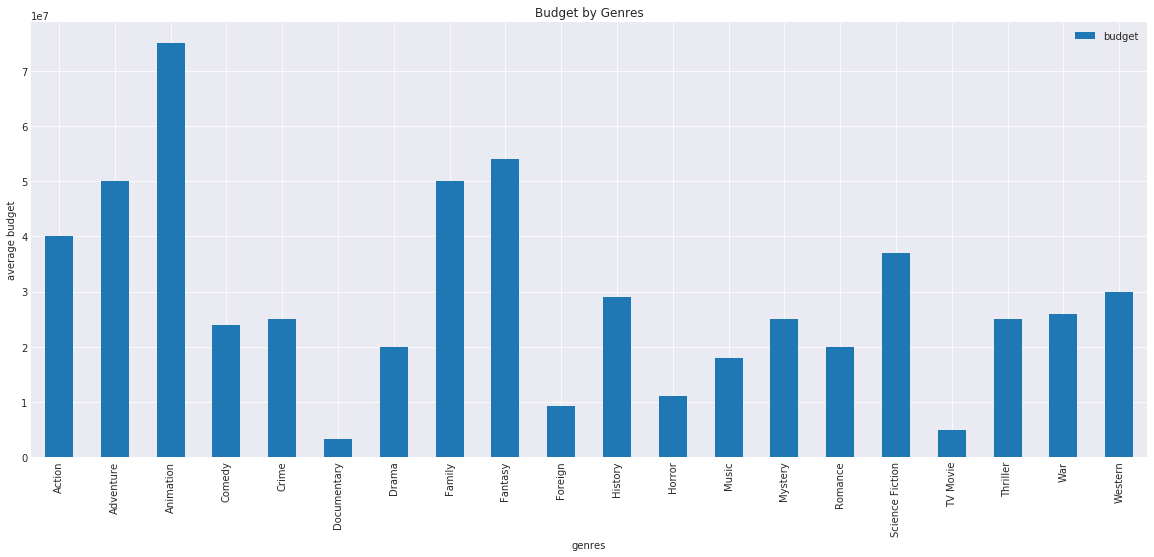

In [335]:
# bar graph of budget by movie genres
plot=mean_genre_budget_df.plot.bar(figsize=(20,8), title='Budget by Genres');
plot.set_ylabel("average budget");
plot.legend();

This graph shows that __Animation__ has the highest ___budget___ while __Documentary__ is the least

<span id='q7'> </span>
### Question 7. Which genre of movies has highest Revenue?
<a href='#toc'>Top</a>

> Compute the mean revenue for each genre and select the max.

In [336]:
# Average revenue by movie genres
mean_genre_revenue_df = df_genre.groupby('genres').median()['revenue']
mean_genre_revenue_df

genres
Action              72704191.0
Adventure          106303988.0
Animation          171757863.0
Comedy              48608666.5
Crime               41637263.0
Documentary         15832848.5
Drama               33917691.5
Family             112462508.0
Fantasy            102272727.0
Foreign              5954398.5
History             54899142.5
Horror              29999213.0
Music               47383689.0
Mystery             38502340.0
Romance             38275483.0
Science Fiction     64238440.0
TV Movie            42000000.0
Thriller            44800002.5
War                 51155219.0
Western             31679776.0
Name: revenue, dtype: float64

In [337]:
# max average revenue by genre
mean_genre_revenue_df.idxmax()

'Animation'

In [338]:
# min average revenue by genre
mean_genre_revenue_df.idxmin()

'Foreign'

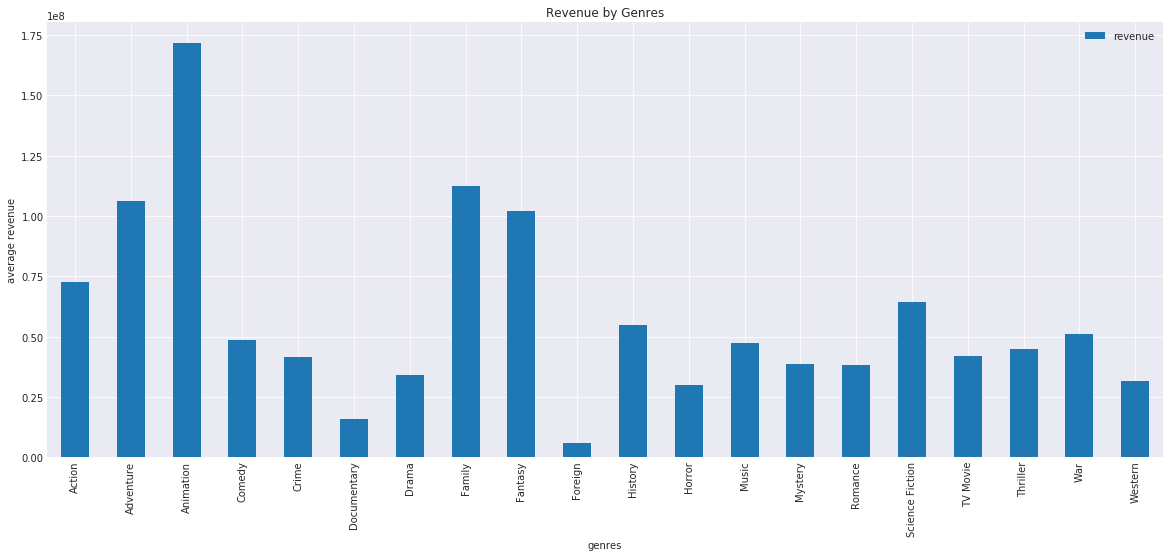

In [339]:
# bar graph of revenue by movie genres
plot = mean_genre_revenue_df.plot.bar(figsize=(20,8), title='Revenue by Genres');
plot.set_ylabel("average revenue");
plot.legend();

This graph shows that __Animation__ has the highest __Revenue__ while __Foreign__ is the least

<span id='q8'> </span>
### Question 8. Do high Budget movies make higher Revenues?
<a href='#toc'>Top</a>

> Group the dataset into low and high budgets. To achieve this, use the median and proceed as follows:

> Low budget < Median. 

> High budget >= Median.

> Use the mean of each category to plot a bar graph.

> Use other graphs (scatter) to visualize the results.

> Also, find the correlation between the Revenue and Budget. 

In [340]:
# Use query to select each group and get its mean quality
# find the median budget
median = df['budget'].median()

# filter df into low and high budgets
low = df.query('budget < {}'.format(median))
high = df.query('budget >= {}'.format(median))

# find the mean revenues for each category
mean_revenue_low = low['revenue'].mean()
mean_revenue_high = high['revenue'].mean()

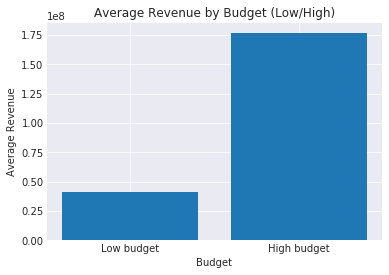

In [341]:
# Create a bar graph
locations = [1, 2]
heights = [mean_revenue_low, mean_revenue_high]
labels = ['Low budget', 'High budget']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue by Budget (Low/High)')
plt.xlabel('Budget')
plt.ylabel('Average Revenue');

In [342]:
# calculate the correlation between Budget and Revenue
df['budget'].corr(df['revenue'])

0.68708942825682084

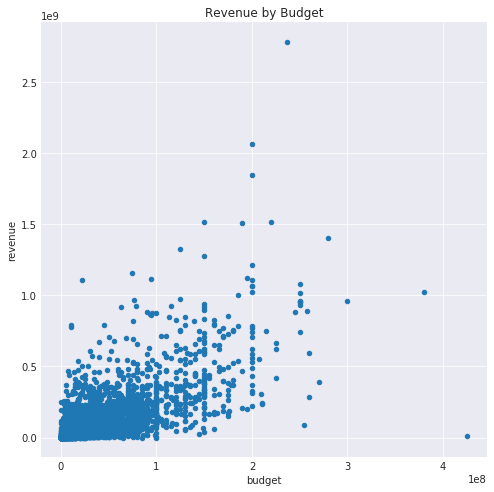

In [343]:
df.plot(x='budget', y='revenue', kind='scatter', figsize=(8,8), title='Revenue by Budget');

Fig 1 and 2 shows that the budget of movies strongly affect its revenue positively.

<span id='q9'> </span>
### Question 9. Which genre of music has highest profit?
<a href='#toc'>Top</a>

> Add a profit column to df_genre. Compute the average profit for each genre.

In [344]:
# add 'profit' column to the df_genre.
df_genre['profit'] = df_genre['revenue'] - df_genre['budget']

# preview to confirm addition of column
df_genre.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,user_rating,profit
32,254470,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,115,Music,Universal Pictures|Gold Circle Films|Brownston...,1264,258506194
40,277216,3.202719,28000000,201634991,Straight Outta Compton,O'Shea Jackson Jr.|Corey Hawkins|Jason Mitchel...,147,Music,New Line Cinema|Universal Pictures|Legendary P...,918,173634991


In [345]:
# Average profit by movie genres
mean_genre_profit_df = df_genre.groupby('genres').median()['profit']
mean_genre_profit_df

genres
Action              31419575.5
Adventure           52104681.0
Animation          110724603.0
Comedy              23004834.5
Crime               16330482.0
Documentary          7924603.0
Drama               12513689.5
Family              58564310.0
Fantasy             52298489.0
Foreign             -3095920.5
History             20487170.0
Horror              16472057.0
Music               20726956.0
Mystery             15492362.0
Romance             17629776.0
Science Fiction     22600832.0
TV Movie            37000000.0
Thriller            19389060.0
War                 22900000.0
Western              6513908.5
Name: profit, dtype: float64

In [346]:
# max average profit by genre
mean_genre_profit_df.idxmax()

'Animation'

In [347]:
# min average profit 
mean_genre_profit_df.idxmin()

'Foreign'

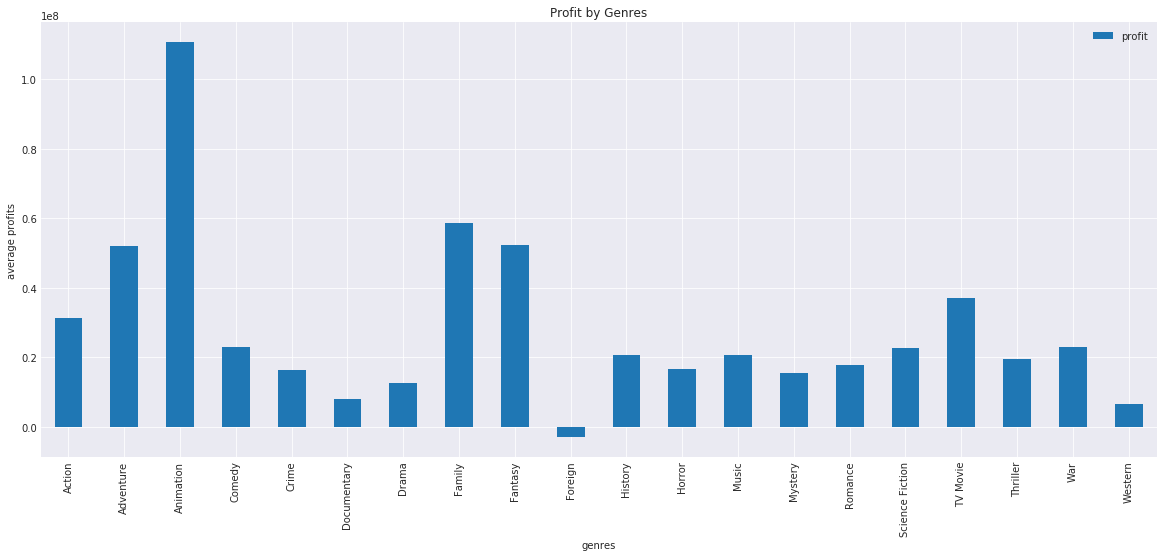

In [348]:
# bar graph of profit by movie genres
plot = mean_genre_profit_df.plot.bar(figsize=(20,8), title='Profit by Genres');
plot.set_ylabel("average profits");
plot.legend();

This graph shows that on average, __Animation__ has the highest ___profit___ while __Foreign__ genre movies on the contrary, averagely make losses.

<span id='q10'> </span>
### Question 10. How does User Rating and Popularity influence Revenue?
<a href='#toc'>Top</a>

> Compute the correlations for user rating, popularity and revenue. Also, make a scatter plot of the user rating and popularity against revenue

In [349]:
# calculate the correlation between user rating, popularity and revenue
df[['revenue','user_rating', 'popularity']].corr()

,revenue,user_rating,popularity
revenue,1.000000,0.753595,0.613831
user_rating,0.753595,1.000000,0.779148
popularity,0.613831,0.779148,1.000000


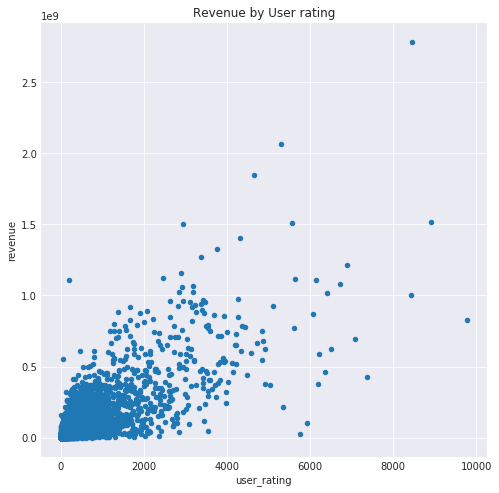

In [350]:
# scatter plot between revenue and user_rating
df.plot(x='user_rating', y='revenue', kind='scatter', figsize=(8,8), title='Revenue by User rating');

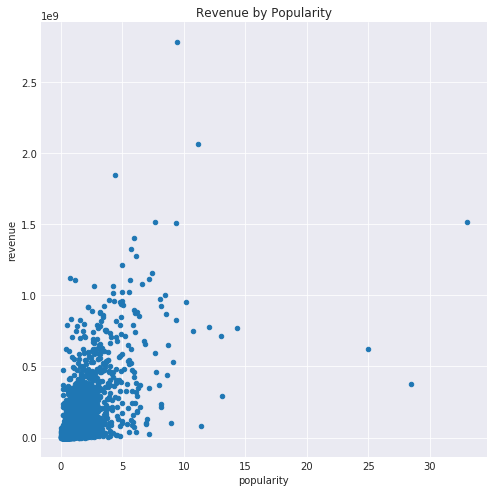

In [351]:
# scatter plot between revenue and popularity
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(8,8), title='Revenue by Popularity');

These graphs show strong positive correlation between __Revenue__ and both __User rating__ and __Popularity__. However, User rating(0.754) has a stronger correlation than Popularity(0.614).

<a id='conclusions'></a>
## Conclusions

>The project anlyzed data from __The Movie Database(TMDb)__. The initial dataset contained a total of 10,866 records with 21 columns, namely *'id','imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj.'*

>Data statistics revealed that over 50% of the data contain zero (0) values for the budget and revenue columns. [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home), from where the original data was obtained, advices that those values should be treated as <a href='#assume'>missing</a>. These records were removed. Null and duplicate entries were dropped.
    
>Also, the following columns *'imdb_id', 'homepage','director', 'tagline', 'keywords', 'overview', 'vote_average', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'* were not relevant to this project and therefore were dropped.

>Furthermore, outliers were not excluded. 

>After cleaning the dataset, a total of 3,855 records with 11 columns remained.

><a href='#toc'>Top</a>

#### Limitations

><ul><li>Over 50% of the data contained zeros (0) and were removed([Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home)). This represents a substantial number of the movies in the dataset and therefore tends to make the remaining data not representative of the overall dataset.</li>  
    </ul> 

><a href='#toc'>Top</a>

#### Results
>The project set out to find answers to the following question:
    <ol id='toc'>
    <li> <a href='#c1'>Which movie has the highest Budget?</a></li>
    <li> <a href='#c2'>Which movie generated the highest Revenue and Profit?</a></li>
    <li> <a href='#c3'>What genre is most produced?</a></li>
    <li> <a href='#c4'>What genre of movies received higher Popularity?</a></li>
    <li> <a href='#c5'>What genre of movies received higher User Ratings?</a></li> 
    <li> <a href='#c6'>What genre of movies has highest Budgets?</a></li>
    <li> <a href='#c7'>What genre of movies has highest Revenues?</a></li>
    <li> <a href='#c8'>Do high Budget movies make higher Revenues?</a></li>
    <li> <a href='#c9'>What genre of music has highest profit?</a></li>
    <li> <a href='#c10'>How does User Rating and Popularity influence Revenue?</a></li>   
    </ol>
>It is noteworthy that the distributions for budget, revenue, profits, popularity and user rating were skewed to the right. For such distributions, [the median was chosen as a better estimator of central tendancy instead of the mean](http://blog.minitab.com/blog/michelle-paret/3-things-a-histogram-can-tell-you).

>The analysis showed the following:
    <ol>
        <li><span id='c1'>Which movie has the highest Budget?
            <ul>
            <li><strong>"The Warrior's Way" at 425,000,000</strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c2'>Which movie generated the highest Revenue and Profit?
            <ul>
            <li><strong>Highest revenue: "Avatar" at 2,781,505,847</strong>.</li>
            <li><strong>Highest profit: "Avatar" at 2,544,505,847</strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c3'>What genre is most produced?
            <ul>
            <li><strong>Drama </strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c4'>What genre of movies received highest Popularity?
            <ul>
            <li><strong>Animation </strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c5'>What genre of movies received highest User Ratings?
            <ul>
            <li><strong>Animation </strong>.</li> 
            </ul>
            </span>
        </li> 
        <li><span id='c6'>What genre of movies has highest Budgets?
            <ul>
            <li><strong>Animation </strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c7'>What genre of movies has highest Revenues?
            <ul>
            <li><strong>Animation </strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c8'>Do high Budget movies make higher Revenues?
            <ul>
            <li>The study found that revenue and budget have a strong positive correlation. Graph of means of low and high budget movies also corroborates the correlation. This suggests that on the average, high budget movies tend to attract higher revenues. </li> 
            </ul>
            </span>
        </li>
        <li><span id='c9'>What genre of music has highest Profit?
            <ul>
            <li><strong>Animation </strong>.</li> 
            </ul>
            </span>
        </li>
        <li><span id='c10'>How does User Rating and Popularity influence Revenue?
            <ul>
            <li>The study found strong positive correlation between Revenue and both User rating and Popularity. However, User rating has a stronger correlation than Popularity. This suggests that mostly, movies with higher User Rating and Popularity tend to attract higher revenues.
                </li> 
            </ul>
            </span>
        </li>  
    </ol>

><a href='#toc'>Top</a>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [352]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0